In [1]:
from time import sleep
import json
import pandas as pd
import io
import re
import numpy as np
from tqdm import tqdm
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tnrange, tqdm_notebook, tqdm

from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
df_price = pd.read_csv('/Users/prashantkumarmayank/Documents/BTC_price_model/notebook/data/BTC-USD.csv')
df_raw = pd.read_csv('/Users/prashantkumarmayank/Documents/BTC_price_model/notebook/data/Bitcoin_tweets.csv')

/var/folders/f3/hgpqbl314pb9h1jmjky8yl5h0000gn/T/ipykernel_98879/814174709.py:2: DtypeWarning: Columns (5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('/Users/prashantkumarmayank/Documents/BTC_price_model/notebook/data/Bitcoin_tweets.csv')


In [4]:
df_raw.shape

(2259788, 13)

In [5]:
df_raw = df_raw.sort_values(by = 'date')
dd = df_raw.sample(frac=0.01, replace=False, random_state=1)
dd.reset_index(inplace=True)
for i,s in enumerate(tqdm(dd['text'],position=0, leave=True)):
    text = str(dd.loc[i, 'text'])
    text = text.replace("#", "")
    text = re.sub('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', '', text, flags=re.MULTILINE)
    text = re.sub('@\\w+ *', '', text, flags=re.MULTILINE)
    dd.loc[i, 'text'] = text

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22598/22598 [00:01<00:00, 13915.09it/s]


In [6]:
dd.head(5)

,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,195760,محمد,esfahan,‏‏‏خودت رو به خودت ثابت کن،نه به دیگران,2021-01-02 19:08:56,616.0,1683,1712,False,2021-06-22 05:22:52,nice project \n\n\n\n\n\nortcoin ort okratech ...,"['ortcoin', 'ort', 'okratech', 'bitcoin', 'air...",Twitter for Android,False
1,1135874,Crypto Revolution Merchandise 💚,NaN,Crypto Revolution the Wave of change 👊😎👊 Not y...,2019-10-13 06:16:05,451.0,2045.0,45077.0,False,2021-08-25 07:06:40,Long Bitcoin short the banks 🧐,['Bitcoin'],Twitter Web App,False
2,332828,STRATO฿ITZ,USA,Digital Token Entrepreneur | Top Mod @ https:/...,2014-04-25 19:40:15,468.0,111.0,1262.0,False,2021-07-02 19:37:18,Top Trending Cryptocurrency Post - DOGECOIN Se...,"['Cryptocurrency', 'Bitcoin']",IFTTT,False
3,581946,U.Today,"New York, USA",https://t.co/Tt6MRU7xb1 is an independent orga...,2018-01-17 09:28:59,35990.0,4447.0,682.0,False,2021-07-24 14:14:53,Can one expect another wave of BTC's decline s...,['BTC'],get shares,False
4,108170,Mr Fulcanelli,Argentina,"be decentralized, be a smart contract",2010-08-23 20:41:38,164.0,100.0,9295.0,False,2021-05-29 15:52:17,We will see…\n\nbitcoin btc bnb band bake $btc...,"['bitcoin', 'btc', 'bnb', 'band', 'bake']",Twitter for Mac,False


In [7]:
df_clean = dd.copy()

In [8]:
df_clean.head(5)

,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,195760,محمد,esfahan,‏‏‏خودت رو به خودت ثابت کن،نه به دیگران,2021-01-02 19:08:56,616.0,1683,1712,False,2021-06-22 05:22:52,nice project \n\n\n\n\n\nortcoin ort okratech ...,"['ortcoin', 'ort', 'okratech', 'bitcoin', 'air...",Twitter for Android,False
1,1135874,Crypto Revolution Merchandise 💚,NaN,Crypto Revolution the Wave of change 👊😎👊 Not y...,2019-10-13 06:16:05,451.0,2045.0,45077.0,False,2021-08-25 07:06:40,Long Bitcoin short the banks 🧐,['Bitcoin'],Twitter Web App,False
2,332828,STRATO฿ITZ,USA,Digital Token Entrepreneur | Top Mod @ https:/...,2014-04-25 19:40:15,468.0,111.0,1262.0,False,2021-07-02 19:37:18,Top Trending Cryptocurrency Post - DOGECOIN Se...,"['Cryptocurrency', 'Bitcoin']",IFTTT,False
3,581946,U.Today,"New York, USA",https://t.co/Tt6MRU7xb1 is an independent orga...,2018-01-17 09:28:59,35990.0,4447.0,682.0,False,2021-07-24 14:14:53,Can one expect another wave of BTC's decline s...,['BTC'],get shares,False
4,108170,Mr Fulcanelli,Argentina,"be decentralized, be a smart contract",2010-08-23 20:41:38,164.0,100.0,9295.0,False,2021-05-29 15:52:17,We will see…\n\nbitcoin btc bnb band bake $btc...,"['bitcoin', 'btc', 'bnb', 'band', 'bake']",Twitter for Mac,False


# Sentiment analysis tweets_clean_file Vader

In [9]:
analyzer = SentimentIntensityAnalyzer()
compound = []
for i,s in enumerate(tqdm(df_clean['text'],position=0, leave=True)):
    # print(i,s)
    vs = analyzer.polarity_scores(str(s))
    compound.append(vs["compound"])
df_clean["compound"] = compound
df_clean.head(2)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22598/22598 [00:00<00:00, 24696.30it/s]


,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,compound
0,195760,محمد,esfahan,‏‏‏خودت رو به خودت ثابت کن،نه به دیگران,2021-01-02 19:08:56,616.0,1683,1712,False,2021-06-22 05:22:52,nice project \n\n\n\n\n\nortcoin ort okratech ...,"['ortcoin', 'ort', 'okratech', 'bitcoin', 'air...",Twitter for Android,False,0.5994
1,1135874,Crypto Revolution Merchandise 💚,NaN,Crypto Revolution the Wave of change 👊😎👊 Not y...,2019-10-13 06:16:05,451.0,2045.0,45077.0,False,2021-08-25 07:06:40,Long Bitcoin short the banks 🧐,['Bitcoin'],Twitter Web App,False,0.0000


# Calculate a score for each tweet


In [10]:
scores = []
for i, s in tqdm(df_clean.iterrows(), total=df_clean.shape[0],position=0, leave=True):
    try:
        scores.append(s["compound"] * ((int(s["user_followers"]))) * ((int(s["user_favourites"])+1)/int(s['user_followers']+1)) *((int(s["is_retweet"])+1)))
    except:
        scores.append(np.nan)
df_clean["score"] = scores
df_clean.head(2)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22598/22598 [00:00<00:00, 65367.87it/s]


,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,compound,score
0,195760,محمد,esfahan,‏‏‏خودت رو به خودت ثابت کن،نه به دیگران,2021-01-02 19:08:56,616.0,1683,1712,False,2021-06-22 05:22:52,nice project \n\n\n\n\n\nortcoin ort okratech ...,"['ortcoin', 'ort', 'okratech', 'bitcoin', 'air...",Twitter for Android,False,0.5994,1025.108064
1,1135874,Crypto Revolution Merchandise 💚,NaN,Crypto Revolution the Wave of change 👊😎👊 Not y...,2019-10-13 06:16:05,451.0,2045.0,45077.0,False,2021-08-25 07:06:40,Long Bitcoin short the banks 🧐,['Bitcoin'],Twitter Web App,False,0.0000,0.000000


In [11]:
df_price.Date = pd.to_datetime(df_price.Date)
# df_price.Timestamp = pd.to_datetime(df_price.Timestamp,unit='s')
df_price.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200


# Sentiment Analysis by Group

In [12]:
# sentiment analysis 
df_clean = df_clean.drop_duplicates()
tweets = df_clean.copy()
tweets['date'] = pd.to_datetime(tweets['date'],utc=True)
tweets.date = tweets.date.dt.tz_localize(None)
tweets.index = tweets['date']

# tweets_grouped = tweets.groupby(pd.TimeGrouper('1h'))['score'].sum()
tweets_grouped = tweets.resample('1h')['score'].sum()

crypto_usd = df_price.copy()
crypto_usd['Date'] = pd.to_datetime(crypto_usd['Date'], unit='s')
crypto_usd.index = crypto_usd['Date']
# crypto_usd['Timestamp'] = pd.to_datetime(crypto_usd['Timestamp'], unit='s')
# crypto_usd.index = crypto_usd['Timestamp']

# crypto_usd_grouped = crypto_usd.groupby(pd.TimeGrouper('1h'))['Weighted_Price'].mean()
crypto_usd_grouped = crypto_usd.resample('D')['Close'].mean()

In [13]:
tweets_grouped.head(5)

date
2021-02-05 13:00:00     283.730432
2021-02-05 14:00:00    1338.456807
2021-02-05 15:00:00    1891.807943
2021-02-05 16:00:00       0.000000
2021-02-05 17:00:00    4053.414612
Name: score, dtype: float64

In [14]:
crypto_usd_grouped.head(5)

Date
2014-09-17    457.334015
2014-09-18    424.440002
2014-09-19    394.795990
2014-09-20    408.903992
2014-09-21    398.821014
Freq: D, Name: Close, dtype: float64

In [15]:
beggining = max(tweets_grouped.index.min().replace(tzinfo=None), crypto_usd_grouped.index.min())
end = min(tweets_grouped.index.max().replace(tzinfo=None), crypto_usd_grouped.index.max())
tweets_grouped = tweets_grouped[beggining:end]
crypto_usd_grouped = crypto_usd_grouped[beggining:end]

# NLP Training

In [16]:
from textblob import TextBlob

df = df_clean.copy()
df.dropna(subset=['hashtags'], inplace=True)
df = df[['text']] 
df.columns = ['tweets']
df.head()

,tweets
0,nice project \n\n\n\n\n\nortcoin ort okratech ...
1,Long Bitcoin short the banks 🧐
2,Top Trending Cryptocurrency Post - DOGECOIN Se...
3,Can one expect another wave of BTC's decline s...
4,We will see…\n\nbitcoin btc bnb band bake $btc...


In [17]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = nltk.corpus.stopwords.words(['english'])

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/prashantkumarmayank/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prashantkumarmayank/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/prashantkumarmayank/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

def cleaning(data):
    #remove urls
    tweet_without_url = re.sub(r'http\S+',' ', data)

    #remove hashtags
    tweet_without_hashtag = re.sub(r'#\w+', ' ', tweet_without_url)

    #3. Remove mentions and characters that not in the English alphabets
    tweet_without_mentions = re.sub(r'@\w+',' ', tweet_without_hashtag)
    precleaned_tweet = re.sub('[^A-Za-z]+', ' ', tweet_without_mentions)

    #2. Tokenize
    tweet_tokens = TweetTokenizer().tokenize(precleaned_tweet)

    #3. Remove Puncs
    tokens_without_punc = [w for w in tweet_tokens if w.isalpha()]

    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #5. lemma
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]

    #6. Joining
    return " ".join(text_cleaned)

In [19]:
df['cleaned_tweets'] = df['tweets'].apply(cleaning)
df['date'] = df_clean['date']
df['date_clean'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
df.drop(columns='date',inplace=True)
df.head()

,tweets,cleaned_tweets,date_clean
0,nice project \n\n\n\n\n\nortcoin ort okratech ...,nice project ortcoin ort okratech bitcoin aird...,2021-06-22
1,Long Bitcoin short the banks 🧐,Long Bitcoin short bank,2021-08-25
2,Top Trending Cryptocurrency Post - DOGECOIN Se...,Top Trending Cryptocurrency Post DOGECOIN Sell...,2021-07-02
3,Can one expect another wave of BTC's decline s...,Can one expect another wave BTC decline soon v...,2021-07-24
4,We will see…\n\nbitcoin btc bnb band bake $btc...,We see bitcoin btc bnb band bake btc dCc xZ dP,2021-05-29


In [20]:
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

In [21]:
def crypto_price_cate(score):
    if score < 1:
        return 'negative'
    elif score == 1:
        return 'neutral'
    else:
        return 'positive'
def observe_period(period):
    res = crypto_usd_grouped.shift(period)/crypto_usd_grouped
    res = res.apply(crypto_price_cate)
    return res 

time_sentiment = observe_period(7) # compare price ratio in 7 days. price_7_days_later/ price_now 
df['crypto_sentiment'] = df.date_clean.apply(lambda x: time_sentiment[x] if x in time_sentiment else np.nan)

In [22]:
df['subjectivity'] = df['cleaned_tweets'].apply(getSubjectivity)
df['polarity'] = df['cleaned_tweets'].apply(getPolarity)
df.head()

,tweets,cleaned_tweets,date_clean,crypto_sentiment,subjectivity,polarity
0,nice project \n\n\n\n\n\nortcoin ort okratech ...,nice project ortcoin ort okratech bitcoin aird...,2021-06-22,positive,1.00,0.600
1,Long Bitcoin short the banks 🧐,Long Bitcoin short bank,2021-08-25,negative,0.35,-0.025
2,Top Trending Cryptocurrency Post - DOGECOIN Se...,Top Trending Cryptocurrency Post DOGECOIN Sell...,2021-07-02,negative,0.40,0.250
3,Can one expect another wave of BTC's decline s...,Can one expect another wave BTC decline soon v...,2021-07-24,negative,0.00,0.000
4,We will see…\n\nbitcoin btc bnb band bake $btc...,We see bitcoin btc bnb band bake btc dCc xZ dP,2021-05-29,positive,0.00,0.000


In [23]:
def getSentiment(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'
df['sentiment'] = df['polarity'].apply(getSentiment)
df['target'] = df['sentiment'] == df['crypto_sentiment']
df.head()

,tweets,cleaned_tweets,date_clean,crypto_sentiment,subjectivity,polarity,sentiment,target
0,nice project \n\n\n\n\n\nortcoin ort okratech ...,nice project ortcoin ort okratech bitcoin aird...,2021-06-22,positive,1.00,0.600,positive,True
1,Long Bitcoin short the banks 🧐,Long Bitcoin short bank,2021-08-25,negative,0.35,-0.025,negative,True
2,Top Trending Cryptocurrency Post - DOGECOIN Se...,Top Trending Cryptocurrency Post DOGECOIN Sell...,2021-07-02,negative,0.40,0.250,positive,False
3,Can one expect another wave of BTC's decline s...,Can one expect another wave BTC decline soon v...,2021-07-24,negative,0.00,0.000,neutral,False
4,We will see…\n\nbitcoin btc bnb band bake $btc...,We see bitcoin btc bnb band bake btc dCc xZ dP,2021-05-29,positive,0.00,0.000,neutral,False


In [24]:
import tensorflow as tf

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Bidirectional, SpatialDropout1D
from tensorflow.keras.models import load_model


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [27]:
df.head()

,tweets,cleaned_tweets,date_clean,crypto_sentiment,subjectivity,polarity,sentiment,target
0,nice project \n\n\n\n\n\nortcoin ort okratech ...,nice project ortcoin ort okratech bitcoin aird...,2021-06-22,positive,1.00,0.600,positive,True
1,Long Bitcoin short the banks 🧐,Long Bitcoin short bank,2021-08-25,negative,0.35,-0.025,negative,True
2,Top Trending Cryptocurrency Post - DOGECOIN Se...,Top Trending Cryptocurrency Post DOGECOIN Sell...,2021-07-02,negative,0.40,0.250,positive,False
3,Can one expect another wave of BTC's decline s...,Can one expect another wave BTC decline soon v...,2021-07-24,negative,0.00,0.000,neutral,False
4,We will see…\n\nbitcoin btc bnb band bake $btc...,We see bitcoin btc bnb band bake btc dCc xZ dP,2021-05-29,positive,0.00,0.000,neutral,False


In [28]:
X = df['cleaned_tweets']
y = pd.get_dummies(df['sentiment']).values
num_classes = df['sentiment'].nunique()

In [29]:
seed = 38 # fix random seed for reproducibility
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17936,) (4484,) (17936, 3) (4484, 3)


In [30]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [31]:
from tensorflow.keras.preprocessing import sequence
max_words = 30
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_test.shape)

(17936, 30) (4484, 30)


In [32]:
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

batch_size = 128
epochs = 10

max_features = 20000
embed_dim = 100

np.random.seed(seed)
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))    
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 100)           2000000   
                                                                 
 conv1d (Conv1D)             (None, 30, 32)            9632      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 15, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 32)            3104      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 7, 32)            0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 100)               5

In [33]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/10


2023-12-22 00:10:16.315137: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


141/141 - 4s - loss: 0.6299 - accuracy: 0.7435 - val_loss: 0.3812 - val_accuracy: 0.8633 - 4s/epoch - 27ms/step
Epoch 2/10
141/141 - 3s - loss: 0.2701 - accuracy: 0.9068 - val_loss: 0.3214 - val_accuracy: 0.8930 - 3s/epoch - 21ms/step
Epoch 3/10
141/141 - 3s - loss: 0.1414 - accuracy: 0.9540 - val_loss: 0.2968 - val_accuracy: 0.9119 - 3s/epoch - 21ms/step
Epoch 4/10
141/141 - 4s - loss: 0.0597 - accuracy: 0.9825 - val_loss: 0.3091 - val_accuracy: 0.9211 - 4s/epoch - 25ms/step
Epoch 5/10
141/141 - 3s - loss: 0.0297 - accuracy: 0.9924 - val_loss: 0.3346 - val_accuracy: 0.9155 - 3s/epoch - 21ms/step
Epoch 6/10
141/141 - 3s - loss: 0.0228 - accuracy: 0.9936 - val_loss: 0.3394 - val_accuracy: 0.9219 - 3s/epoch - 22ms/step
Epoch 7/10
141/141 - 3s - loss: 0.0141 - accuracy: 0.9968 - val_loss: 0.3608 - val_accuracy: 0.9217 - 3s/epoch - 20ms/step
Epoch 8/10
141/141 - 3s - loss: 0.0100 - accuracy: 0.9974 - val_loss: 0.3824 - val_accuracy: 0.9266 - 3s/epoch - 22ms/step
Epoch 9/10
141/141 - 3s - l

In [34]:
# predict class with test set
y_pred_test =  np.argmax(model.predict(X_test), axis=1)
print('Accuracy:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100))
print(classification_report(np.argmax(y_test,axis=1), y_pred_test))

141/141 [==============================] - 0s 2ms/step
Accuracy:	92.5%
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       478
           1       0.94      0.94      0.94      1782
           2       0.94      0.95      0.94      2224

    accuracy                           0.92      4484
   macro avg       0.89      0.88      0.89      4484
weighted avg       0.92      0.92      0.92      4484



141/141 [==============================] - 0s 2ms/step
2    2224
1    1782
0     478
Name: count, dtype: int64
2    2259
1    1791
0     434
Name: count, dtype: int64


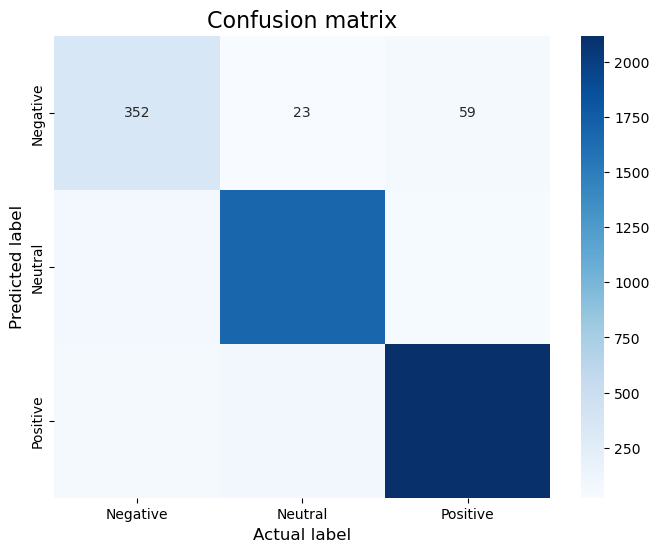

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative','Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(y_pred, axis=1),np.argmax(np.array(y_test),axis=1))
    
    print(pd.Series(np.argmax(np.array(y_test),axis=1)).value_counts())
    print(pd.Series(np.argmax(y_pred, axis=1)).value_counts())
    
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)